# 11 Root finding and Trial-and-Error search 

We want to find the roots $x_0$of

$$
f(x_0) = 0
$$

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')

## Bisection
(Demonstrate algorithm on board).



In [3]:
import numpy as np

### Trial functions 

Define two functions to work with; finding the roots amounts to solving a transcendental equation:

\begin{gather}
f(x) = 2\cos x - x = 0
\end{gather}

The following solution comes up for the energy eigenvalues of the bound particle states in the finite square well in quantum mechanics I:

\begin{gather}
f(E) = \sqrt{V_0 - E} \tan\sqrt{V_0 - E} - \sqrt{E} = 0
\end{gather}

($V_0$ is the depth of the well potential. This solution is for even states.)


In [93]:
def f(x):
    return 2*np.cos(x) - x

def well(E, V0=10):
    return np.sqrt(V0 - E)*np.tan(np.sqrt(V0 - E)) - np.sqrt(E)

### Implementation of the bisection algorithm 

In [114]:
def bisection(f, xminus, xplus, Nmax=100, eps=1e-14):
    for iteration in range(Nmax):
        x = (xplus + xminus)/2
        fx = f(x)
        if f(xplus) * fx > 0:
            # root is not between xplus and x
            xplus = x
        else:
            xminus = x
        if np.abs(fx) < eps:
            break
    else:
        print("bisect: no root found after {0} iterations (eps={1}); "
              "best guess is {2} with error {3}".format(Nmax, eps, x, fx))
        x = None
    return x

### Testing with $f(x)$ 

In [21]:
x0 = bisection(f, 0, 7)
print(x0)

1.029866529322259


In [18]:
f(x0)

-6.6613381477509392e-16

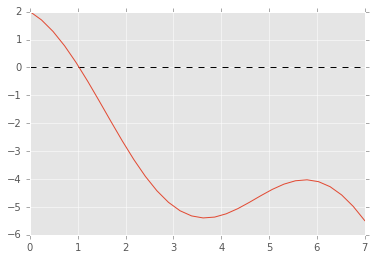

In [20]:
X = np.linspace(0, 7, 30)
plt.plot(X, np.zeros_like(X), 'k--')
plt.plot(X, f(X))

### Activity

1. Find solutions for the square well for $V_0 = 10$
2. Plot `well(E, V_0=10)` for $0 < E < 11$ and check your solution graphically.
3. Vary the bracketing range to find all roots.

In [94]:
E1 = bisection(well, 0, 10)
print(E1)

0.004019262453329175


In [95]:
well(E1)

5.6898930012039273e-16

In [96]:
E_values = np.linspace(0, 11, 100)

/opt/local/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel/__main__.py:5: RuntimeWarning: invalid value encountered in sqrt


(-10, 10)

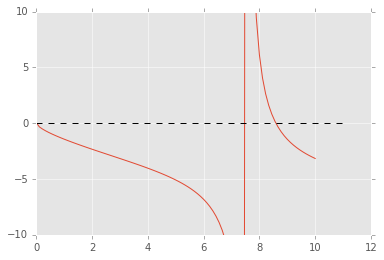

In [97]:
plt.plot(E_values, well(E_values, V0=10))
plt.plot(E_values, np.zeros_like(E_values), 'k--')
plt.ylim(-10,10)

In [115]:
E2 = bisection(well, 8.5, 10)
print(E2)
print(well(E2))

8.59278527522984
-3.5527136788e-15


#### Alternative form of the well 

Alternative form of the equation for the well:
$$
f(E) = \sqrt{E} \cot\sqrt{V_0 - E} - \sqrt{V_0 - E} = 0
$$

In [74]:
def well2(E, V0=10):
    return np.sqrt(E) / np.tan(np.sqrt(V0 - E)) - np.sqrt(V0 - E)

/opt/local/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in sqrt
  from ipykernel import kernelapp as app
/opt/local/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel/__main__.py:2: RuntimeWarning: divide by zero encountered in true_divide
  from ipykernel import kernelapp as app


(-10, 10)

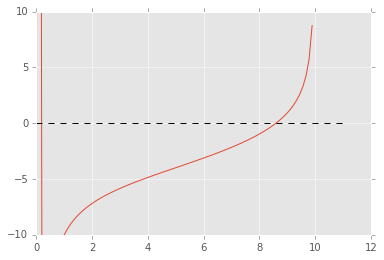

In [76]:
E_values = np.linspace(0, 11, 100)
plt.plot(E_values, well2(E_values, V0=10))
plt.plot(E_values, np.zeros_like(E_values), 'k--')
plt.ylim(-10,10)

In [79]:
E0 = bisection(well2, 0, 0.1)
print(E0)
print(well2(E0))
print(well(E0))

0.0040192624533292465
-4.4408920985e-16
-0.137137438953


In [116]:
E1 = bisection(well2, 8, 9.9)
print(E1)
print(well2(E1))
print(well(E1))

8.592785275229836
-4.4408920985e-15
1.11022302463e-14


### Additional activity: deeper well
Find bound states for a well with $V_0 = 20$

Use [lambda functions](https://docs.python.org/3/tutorial/controlflow.html#lambda-expressions) (anonymous or "on-the-fly" functions) or define a new function `well20()`:

In [117]:
def well20(E):
    return well(E, V0=20)

In [118]:
bisection(well20, 0, 5, Nmax=10)

bisect: no root found after 10 iterations (eps=1e-14); best guess is 0.0048828125 with error 18.139614720247465


For experts: using anonynmous functions (same thing as above but saves typing... possibly at the cost of lack of clarity):

In [120]:
bisection(lambda E: well(E, V0=20), 0, 5, Nmax=10)

bisect: no root found after 10 iterations (eps=1e-14); best guess is 0.0048828125 with error 18.139614720247465


plot to get a better idea

/opt/local/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel/__main__.py:5: RuntimeWarning: invalid value encountered in sqrt


(-10, 10)

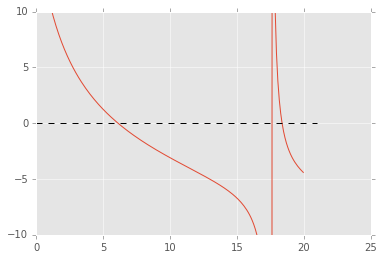

In [121]:
E_values = np.linspace(0, 21, 200)
plt.plot(E_values, well20(E_values))
plt.plot(E_values, np.zeros_like(E_values), 'k--')
plt.ylim(-10,10)

In [123]:
bisection(well20, 0, 10)

6.108467017547632

In [127]:
bisection(well20, 17, 20, eps=1e-13)

18.360519852466737

## Newton-Raphson
(Demonstrate algorithm on board)

### Activity: Implement Newton-Raphson
1. Implement the Newton-Raphson algorithm
2. Test with $f(x)$ and the well for $V_0 = 10$.
3. Bonus: test performance of `newton_raphson()` against `bisection()`.

In [113]:
def newton_raphson(f, x, h=3e-1, Nmax=100, eps=1e-14):
    for iteration in range(Nmax):
        fx = f(x)
        if np.abs(fx) < eps:
            break
        df = (f(x + h/2) - f(x - h/2))/h
        Delta_x = -fx/df
        x += Delta_x
    else:
        print("Newton-Raphson: no root found after {0} iterations (eps={1}); "
              "best guess is {2} with error {3}".format(Nmax, eps, x, fx))
        x = None
    return x

In [72]:
newton_raphson(f, 0)

1.0298665293222589

In [137]:
newton_raphson(well, 0.3, eps=1e-14)

Newton-Raphson: no root found after 100 iterations (eps=1e-14); best guess is nan with error nan


/opt/local/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel/__main__.py:5: RuntimeWarning: invalid value encountered in sqrt
/opt/local/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel/__main__.py:4: RuntimeWarning: invalid value encountered in absolute


Can't get it to converge for the first root. Second root works:

In [138]:
newton_raphson(well, 9, eps=1e-14)

8.5927852752298381

Note that bisection is more robust and finds the first root:

In [139]:
bisection(well, 0, 1)

0.0040192624533297305

In [140]:
%timeit newton_raphson(well, 9)

1000 loops, best of 3: 302 µs per loop


In [141]:
%timeit bisection(well, 8, 9)

1000 loops, best of 3: 984 µs per loop
